<a href="https://colab.research.google.com/github/suhyeon03/DeepLearning/blob/main/%EB%8C%80%ED%91%9C%EC%A0%81%EC%9D%B8_CNN(VGG16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# step 58
대표적인 CNN(VGG16)

* 이번 단계에서는 이전 단계에서 구현한 Conv2d 계층과 pooling 함수를 이용하여 유명한 모댈하나를 구현한다.
* 또한 학습된 가중치를 사용하여 추론도 해보자.

VGG16 구현

VGG는 2014년 ILSVRC 대회에서 준우승한 모델이다.

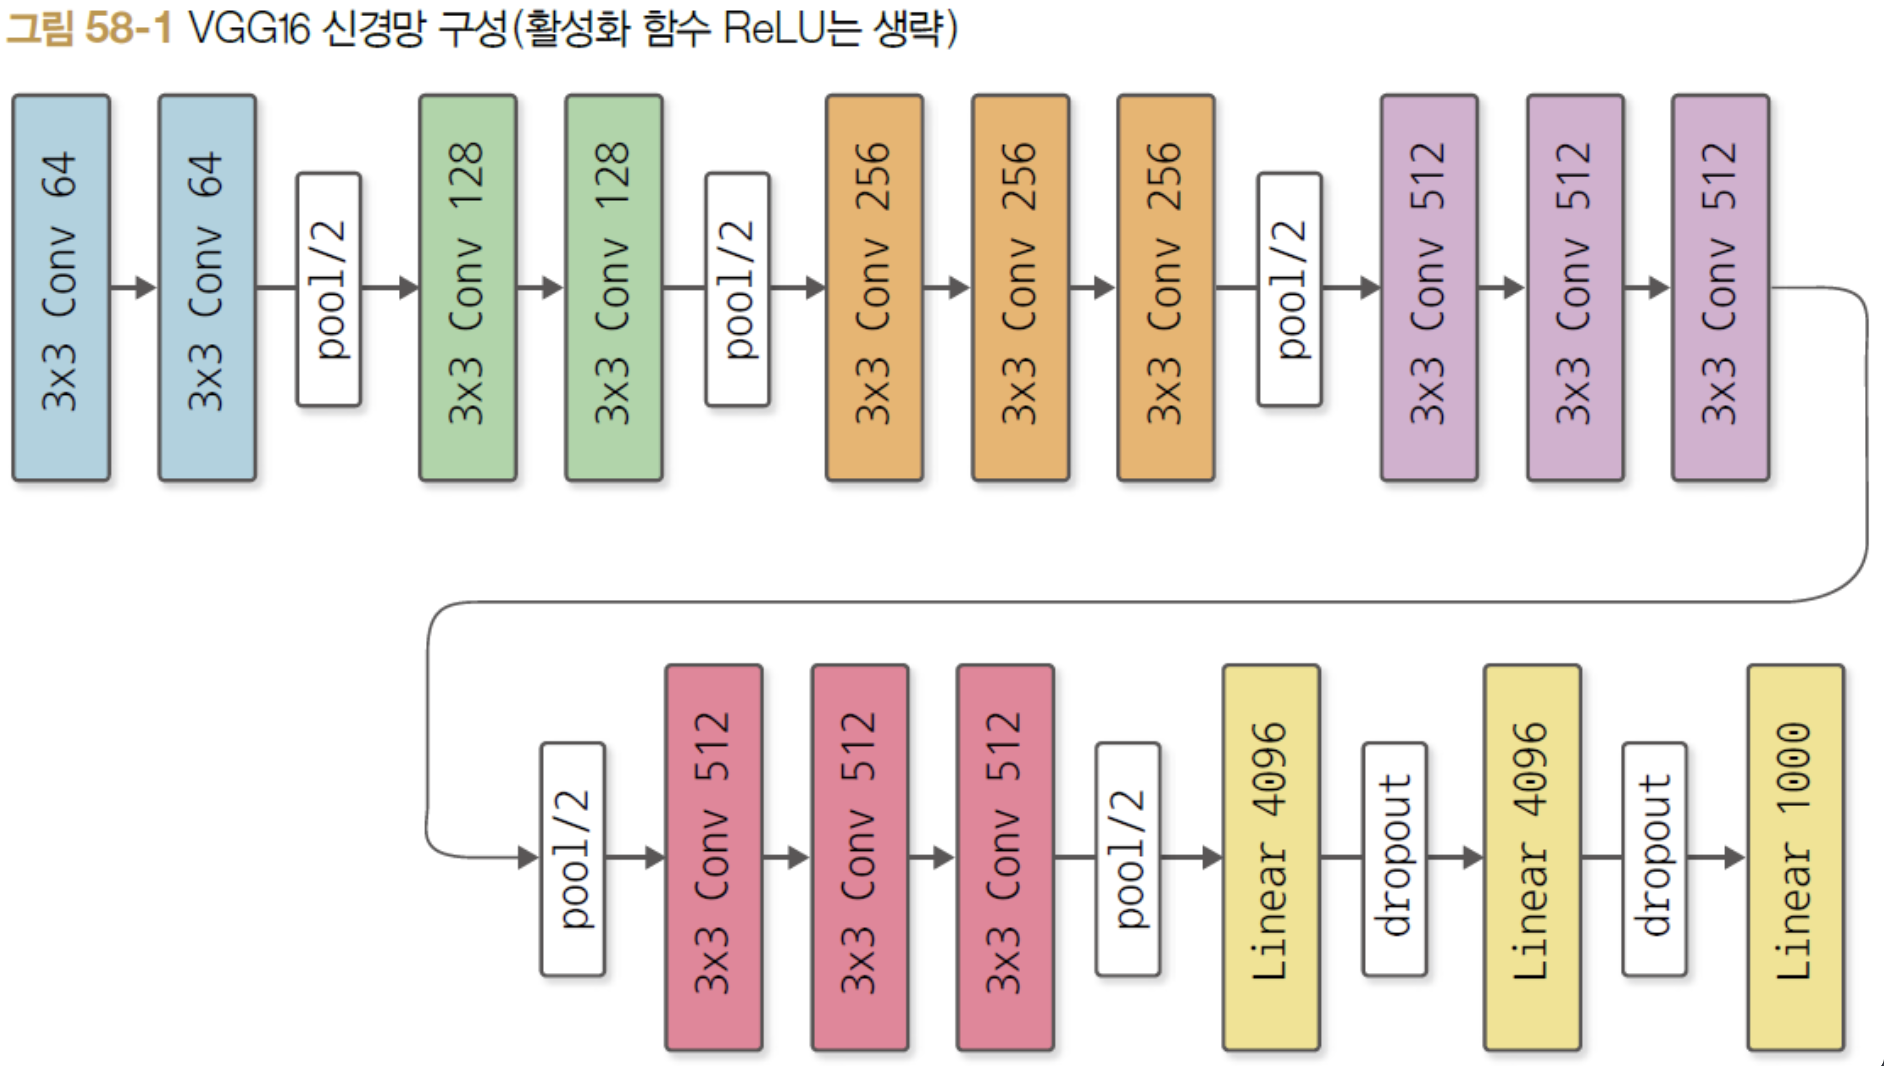

* 위 그림의 '3x3 conv 64'는 커널 크기가 3x3이고 출력 채널 수가 64개라는 뜻이다.
* 또한 'pool/2'는 2x2 풀링을, 'Linear 4096'은 출력 크기가 4096인 완전연결계층을 가르킨다.
* 이 VGG16의 특징으로는 다음과 같은 점을 뽑을 수 있다.
  * 3x3 합성곱층 사용 (패딩은 1x1)
  * 합성곱층의 채널 수는 (기본적으로) 풀링하면 2배로 증가(64 -> 128 -> 256 -> 512)
  * 완전연결계층에서는 드롭아웃 사용
  * 활성화 함수로는 ReLU 사용

In [4]:
!git clone https://github.com/GoGiants1/dl-from-scratch-3.git
import sys
sys.path.append('dl-from-scratch-3')

Cloning into 'dl-from-scratch-3'...
remote: Enumerating objects: 2327, done.
remote: Counting objects: 100% (2327/2327), done.
remote: Compressing objects: 100% (852/852), done.
remote: Total 2327 (delta 1503), reused 2287 (delta 1463), pack-reused 0 (from 0)
Receiving objects: 100% (2327/2327), 33.93 MiB | 27.96 MiB/s, done.
Resolving deltas: 100% (1503/1503), done.


In [9]:
import dezero.functions as F
import dezero.layers as L
from dezero import Model

class VGG16(Model):
    def __init__(self):
        super().__init__()
        # 출력 채널 수만큼 지정
        self.conv1_1 = L.Conv2d(64, kernel_size=3, stride=1, pad=1)
        self.conv1_2 = L.Conv2d(64, kernel_size=3, stride=1, pad=1)
        self.conv2_1 = L.Conv2d(128, kernel_size=3, stride=1, pad=1)
        self.conv2_2 = L.Conv2d(128, kernel_size=3, stride=1, pad=1)
        self.conv3_1 = L.Conv2d(256, kernel_size=3, stride=1, pad=1)
        self.conv3_2 = L.Conv2d(256, kernel_size=3, stride=1, pad=1)
        self.conv3_3 = L.Conv2d(256, kernel_size=3, stride=1, pad=1)
        self.conv4_1 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
        self.conv4_2 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
        self.conv4_3 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
        self.conv5_1 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
        self.conv5_2 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
        self.conv5_3 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
        self.fc6 = L.Linear(4096) # 출력 크기만 지정
        self.fc7 = L.Linear(4096)
        self.fc8 = L.Linear(1000)

    def forward(self, x):
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = F.pooling(x, 2, 2)
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = F.pooling(x, 2, 2)
        x = F.relu(self.conv3_1(x))
        x = F.relu(self.conv3_2(x))
        x = F.relu(self.conv3_3(x))
        x = F.pooling(x, 2, 2)
        x = F.relu(self.conv4_1(x))
        x = F.relu(self.conv4_2(x))
        x = F.relu(self.conv4_3(x))
        x = F.pooling(x, 2, 2)
        x = F.relu(self.conv5_1(x))
        x = F.relu(self.conv5_2(x))
        x = F.relu(self.conv5_3(x))
        x = F.pooling(x, 2, 2)
        x = F.reshape(x, (x.shape[0], -1)) # 형상 변환
        x = F.dropout(F.relu(self.fc6(x)))
        x = F.dropout(F.relu(self.fc7(x)))
        x = self.fc8(x)
        return x

* 코드는 길지만 구성은 간단하다.
* 초기화에서는 필요한 계층들을 생성한다.
* 그리고 forward 메서드에서 이 계층들과 함수를 사용하여 진행한다.

* 1에서는 합성곱층을 생성할 때 입력 데이터의 채널 수를 지정하지않는다.
* 입력 데이터의 채널 수는 순전파 시에 흐르는 데이터로부터 얻고, 그 시점에 가중치 매개변수를 초가화한다.
* 또한 2의 L.Linear(4096)에서도 마찬가지로 출력 크기만 지정한다.
* 입력 크기는 실제로 흘러들어온 데이터를 보고 자동으로 결정하기 때문이다.
* 이어서 3에서는 합성곱층에서 완전연결계층으로 전환하기 위해 데이터의 형상을 반환한다.
* 합성곱층에서는 4차원 텐서를 처리하지만 완전연결계층에서는 2차원 텐서를 처리한다.
* 따라서 완전연결계층에 데이터를 제공하기 전에 reshape 함수를 사용하여 2차원 텐서로 바꾼다.

학습된 가중치 데이터
* VGG16은 이미지넷이라고 하는 거대한 데이터셋으로 학습한다.
* 그리고 학습이 완료된 가중치 데이터가 공개되어 있다.
* 이번 절에서는 이 학습괸 가중치 데이터를 읽어오는 기능을 VGG16 클래스에 추가한다.

In [ ]:
class VGG16(Model):
    WEIGHTS_PATH = (
        "https://github.com/koki0702/dezero-models/releases/download/v0.1/vgg16.npz"
    )

    def __init__(self, pretrained=False):
        super().__init__()
        '''

* VGG16 클래스의 초기화 메서드에 인수 pretrained=False를 추가한다.
* 이 플래그를 True로 설정하면 지정된 장소에서 가중치 파일을 받아 캐시 디렉터리에 저장한 후 메모리로 읽어 들인다.
* 53 단계에서 추가한 기능이다.
* 계산 그래프를 시각화하면 다음과 같다.

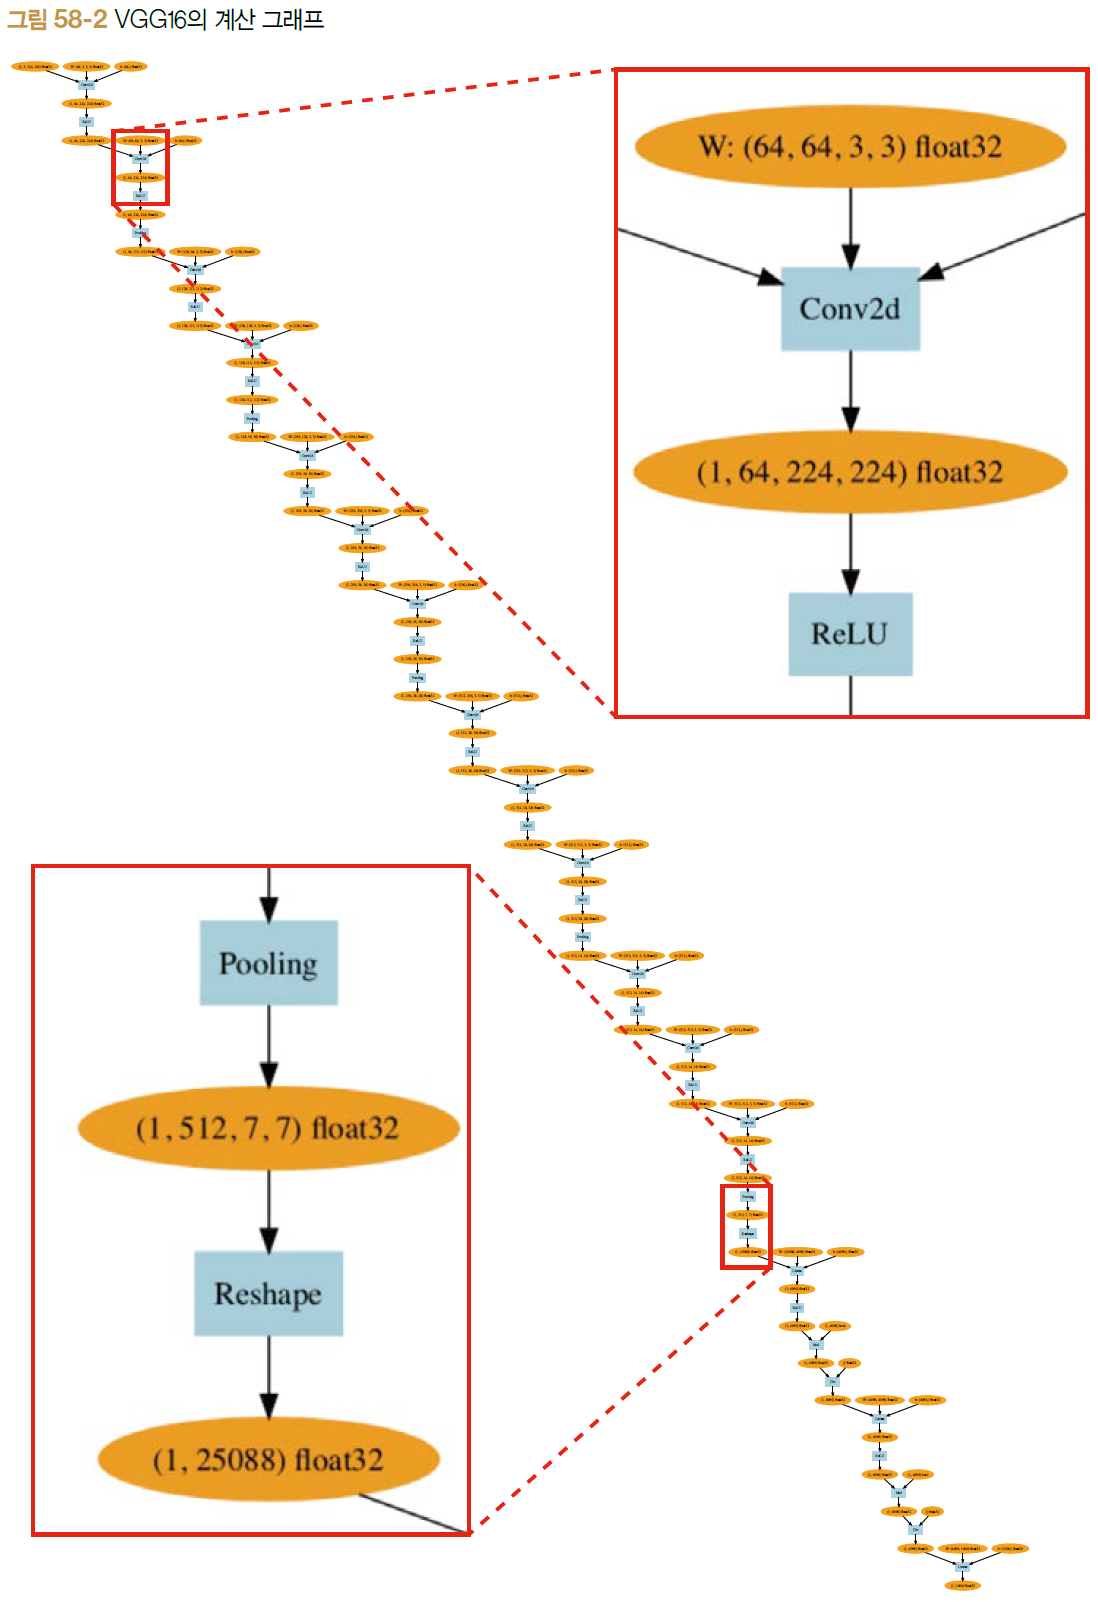

학습된 VGG16 사용하기
* 우선 샘플 이미지를 읽는 일부터 시작한다.

In [11]:
import dezero
from PIL import Image

url = 'https://github.com/WegraLee/deep-learning-from-scratch-3/' \
      'raw/images/zebra.jpg'
img_path = dezero.utils.get_file(url)
img = Image.open(img_path)
img.show()

Downloading: zebra.jpg
[##############################] 100.00% Done


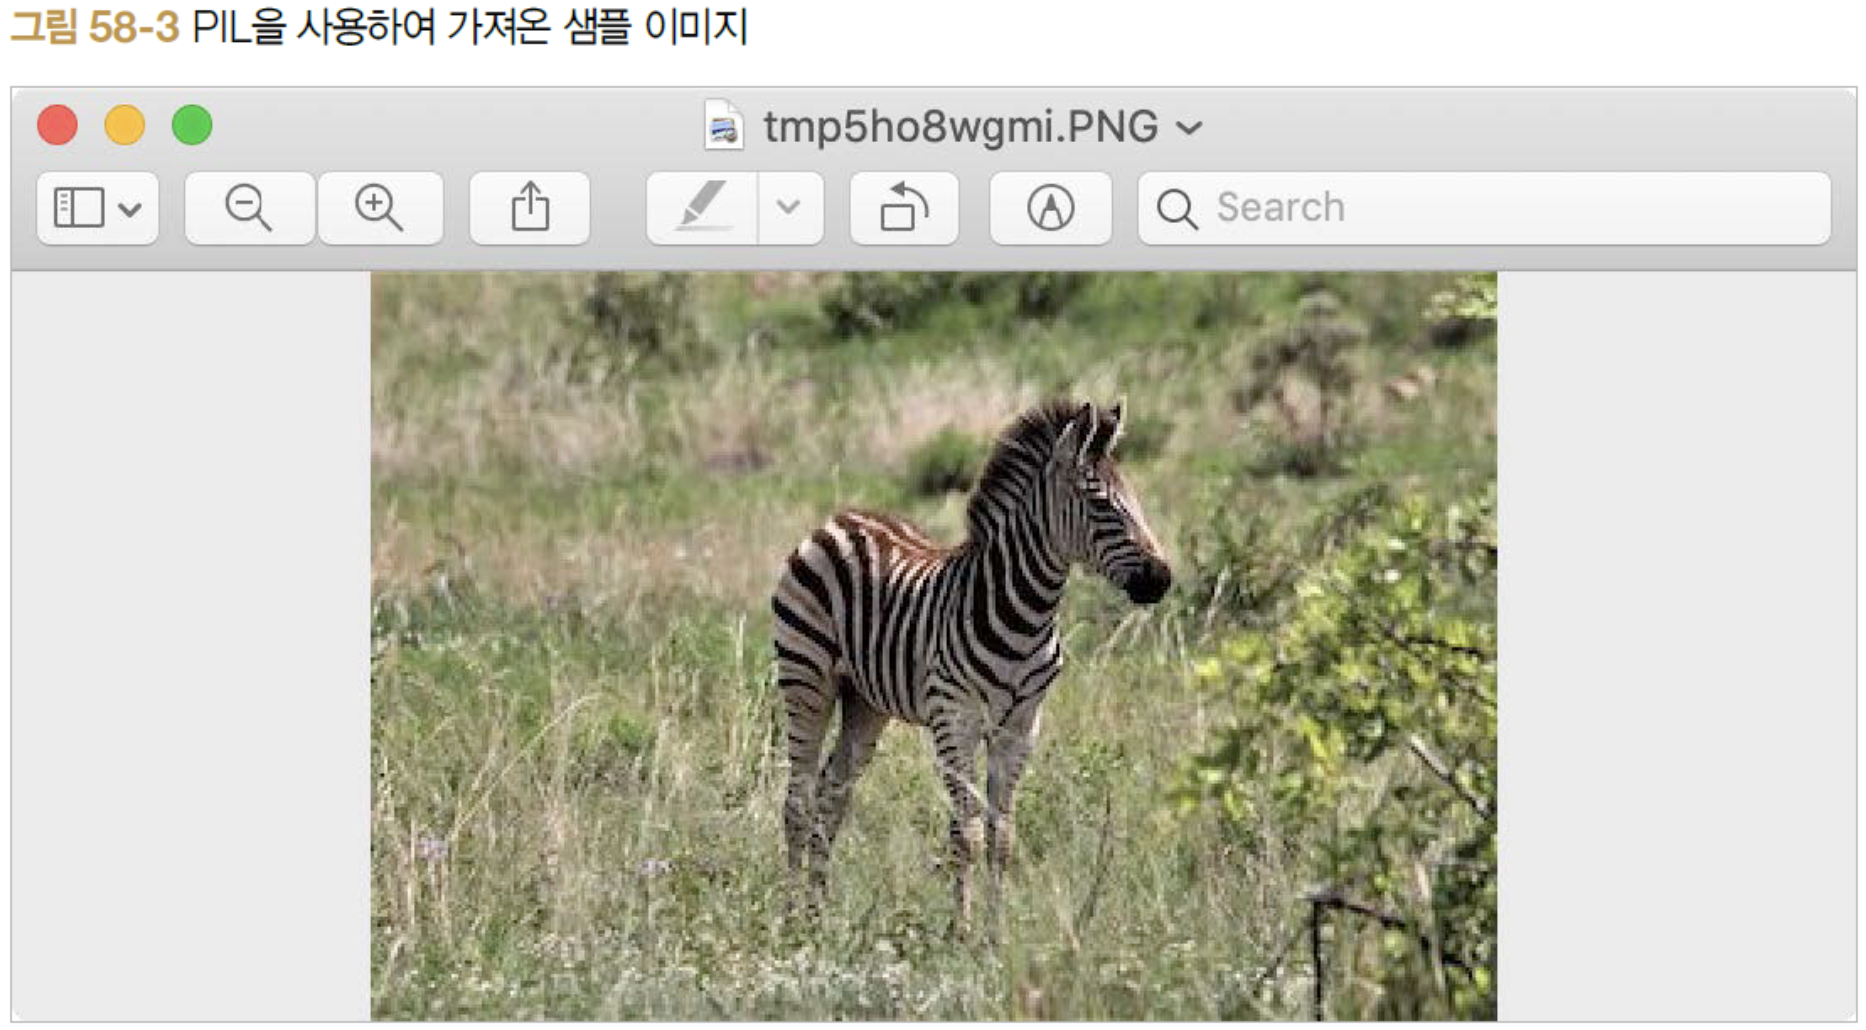

* 앞의 코드에서 이미지를 읽어오는 부분은 img=Image.open(img_path)이고, 이때 img의 데이터타입은 PIL.Image이다. 하지만 DeZero는 ndarray 타입 데이터를 취급하므로 적절한 변환을 해줘야 한다.
* 이를 위해 DeZero는 VGG16 클래스에 정직 메서드인 preprocess를 준비해뒀다.

In [16]:
from dezero.models import VGG16

x = VGG16.preprocess(img)
print(type(x), x.shape)

<class 'numpy.ndarray'> (3, 224, 224)


* preporcess는 정적 메서드이므로 인스턴스가 아닌 클래스에서 호출해야한다.
* 인수로 PIL.Image 타입의 데이터를 제공하면 내부에서 높이 224, 너비 224 크기로 조정한 후 ndarray 인스턴스로 변환해 돌려준다.
* 여기서 (224,224)는 VGG16 입력 이미지의 크기다.
* 그리고 VGG16.preprocess 메서드는 이미지넷을 학습할 때 필요한 또 다른 전처리도 해준다.
* 예를 들어 색상 채널을 BGR 순서로 재정렬하거나, 이미지넷 데이터셋으로 미리 구해둔 채널별 평균을 모든 픽샐에서 빼주는 등의 전처리를 해준다.

* 학습된 가중치 데이터를 사용하여 미지의 데이터를 추론할 때는 모델을 학습시켰을때와 똑같은 전처리를 해줘야한다.

In [17]:
import numpy as np
from PIL import Image
import dezero
from dezero.models import VGG16


url = 'https://github.com/oreilly-japan/deep-learning-from-scratch-3/raw/images/zebra.jpg'
img_path = dezero.utils.get_file(url)
img = Image.open(img_path)

x = VGG16.preprocess(img)
x = x[np.newaxis]

model = VGG16(pretrained=True)
with dezero.test_mode():
    y = model(x)
predict_id = np.argmax(y.data)

model.plot(x, to_file='vgg.pdf')
labels = dezero.datasets.ImageNet.labels()
print(labels[predict_id])

Downloading: vgg16.npz
[##############################] 100.00% Done
Downloading: imagenet1000_clsidx_to_labels.txt
[##############################] 100.00% Done
zebra


* 먼저 이미지를 읽어 들어 전처리를 끝낸 후 배치용 축을 맨 앞에 추가했다.
* 이제 x의 형상은 (3, 224, 224)에서 (1, 3, 224, 224)로 바뀌었다.
* 이어서 VGG16에 데이터를 주어 추론을 수행했다. 여기에서는 출력 층(1000 클래스)에서 가장 큰 값을 가리키는 인덱스가 모델이 분류한 결과이다.
* 또한 이미지넷 레이블도 준비되어 있어서
* 이 데이터를 사용하면 객체의 id로 레이블 이름을 알아낼 수 있다.